In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
# Load the data
df = pd.read_csv('basicdata.csv')
df

,Date,Close_gold,Close_sp500,Close_vix,Close_eur_usd,Close_oil,CFSI
0,2004-11-18,44.380001,1183.550049,12.980000,1.294901,46.220001,-0.32
1,2004-11-19,44.779999,1170.339966,13.500000,1.303900,48.439999,-0.31
2,2004-11-22,44.950001,1177.239990,12.970000,1.304002,48.639999,-0.31
3,2004-11-23,44.750000,1176.939941,12.670000,1.309706,48.939999,-0.31
4,2004-11-24,45.049999,1181.760010,12.720000,1.317801,49.439999,-0.31
...,...,...,...,...,...,...,...
2461,2014-10-13,118.519997,1874.739990,24.639999,1.263983,85.739998,-0.33
2462,2014-10-14,118.589996,1877.699951,22.790001,1.272394,81.839996,-0.23
2463,2014-10-15,118.989998,1862.489990,25.270000,1.263903,81.779999,-0.14
2464,2014-10-16,119.220001,1862.760010,25.200001,1.282166,82.699997,-0.04


In [42]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the percent changes and boolean direction for each series
for column in ['Close_gold', 'Close_sp500', 'Close_vix', 'Close_eur_usd', 'Close_oil']:
    df[f'Pct_change_{column}'] = df[column].pct_change()
    df[f'Direction_{column}'] = df[column].diff().apply(lambda x: 1 if x > 0 else 0)

# Shift the gold direction to create the Target variable
df['Target'] = df['Direction_Close_gold'].shift(-1)
# Calculate the actual change in gold price for the next day and shift it to create the Target variable for actual change
df['Target_Change'] = df['Pct_change_Close_gold'].shift(-1)

# Display the updated dataframe with boolean directions and the new Target variable
df


,Date,Close_gold,Close_sp500,Close_vix,Close_eur_usd,Close_oil,CFSI,Pct_change_Close_gold,Direction_Close_gold,Pct_change_Close_sp500,Direction_Close_sp500,Pct_change_Close_vix,Direction_Close_vix,Pct_change_Close_eur_usd,Direction_Close_eur_usd,Pct_change_Close_oil,Direction_Close_oil,Target,Target_Change
0,2004-11-18,44.380001,1183.550049,12.980000,1.294901,46.220001,-0.32,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,1.0,0.009013
1,2004-11-19,44.779999,1170.339966,13.500000,1.303900,48.439999,-0.31,0.009013,1,-0.011161,0,0.040062,1,0.006950,1,0.048031,1,1.0,0.003796
2,2004-11-22,44.950001,1177.239990,12.970000,1.304002,48.639999,-0.31,0.003796,1,0.005896,1,-0.039259,0,0.000078,1,0.004129,1,0.0,-0.004449
3,2004-11-23,44.750000,1176.939941,12.670000,1.309706,48.939999,-0.31,-0.004449,0,-0.000255,0,-0.023130,0,0.004374,1,0.006168,1,1.0,0.006704
4,2004-11-24,45.049999,1181.760010,12.720000,1.317801,49.439999,-0.31,0.006704,1,0.004095,1,0.003946,1,0.006180,1,0.010217,1,1.0,0.007769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,2014-10-13,118.519997,1874.739990,24.639999,1.263983,85.739998,-0.33,0.007909,1,-0.016468,0,0.160075,1,-0.003880,0,-0.000932,0,1.0,0.000591
2462,2014-10-14,118.589996,1877.699951,22.790001,1.272394,81.839996,-0.23,0.000591,1,0.001579,1,-0.075081,0,0.006654,1,-0.045486,0,1.0,0.003373
2463,2014-10-15,118.989998,1862.489990,25.270000,1.263903,81.779999,-0.14,0.003373,1,-0.008100,0,0.108820,1,-0.006673,0,-0.000733,0,1.0,0.001933
2464,2014-10-16,119.220001,1862.760010,25.200001,1.282166,82.699997,-0.04,0.001933,1,0.000145,1,-0.002770,0,0.014450,1,0.011250,1,0.0,-0.001929


In [43]:
# drop na rows
df = df.dropna()
df

,Date,Close_gold,Close_sp500,Close_vix,Close_eur_usd,Close_oil,CFSI,Pct_change_Close_gold,Direction_Close_gold,Pct_change_Close_sp500,Direction_Close_sp500,Pct_change_Close_vix,Direction_Close_vix,Pct_change_Close_eur_usd,Direction_Close_eur_usd,Pct_change_Close_oil,Direction_Close_oil,Target,Target_Change
1,2004-11-19,44.779999,1170.339966,13.500000,1.303900,48.439999,-0.31,0.009013,1,-0.011161,0,0.040062,1,0.006950,1,0.048031,1,1.0,0.003796
2,2004-11-22,44.950001,1177.239990,12.970000,1.304002,48.639999,-0.31,0.003796,1,0.005896,1,-0.039259,0,0.000078,1,0.004129,1,0.0,-0.004449
3,2004-11-23,44.750000,1176.939941,12.670000,1.309706,48.939999,-0.31,-0.004449,0,-0.000255,0,-0.023130,0,0.004374,1,0.006168,1,1.0,0.006704
4,2004-11-24,45.049999,1181.760010,12.720000,1.317801,49.439999,-0.31,0.006704,1,0.004095,1,0.003946,1,0.006180,1,0.010217,1,1.0,0.007769
5,2004-11-29,45.400002,1178.569946,13.300000,1.326506,49.759998,-0.25,0.007769,1,-0.002699,0,0.045597,1,0.006606,1,0.006472,1,0.0,-0.006167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,2014-10-10,117.589996,1906.130005,21.240000,1.268907,85.820000,-0.41,-0.000425,0,-0.011451,0,0.132196,1,-0.004238,0,0.000583,1,1.0,0.007909
2461,2014-10-13,118.519997,1874.739990,24.639999,1.263983,85.739998,-0.33,0.007909,1,-0.016468,0,0.160075,1,-0.003880,0,-0.000932,0,1.0,0.000591
2462,2014-10-14,118.589996,1877.699951,22.790001,1.272394,81.839996,-0.23,0.000591,1,0.001579,1,-0.075081,0,0.006654,1,-0.045486,0,1.0,0.003373
2463,2014-10-15,118.989998,1862.489990,25.270000,1.263903,81.779999,-0.14,0.003373,1,-0.008100,0,0.108820,1,-0.006673,0,-0.000733,0,1.0,0.001933


In [44]:
df.to_csv("fulldata.csv", index=False)

In [59]:
# count the number of 1s and 0s in the target
df['Target'].value_counts()

Target
1.0    1316
0.0    1148
Name: count, dtype: int64

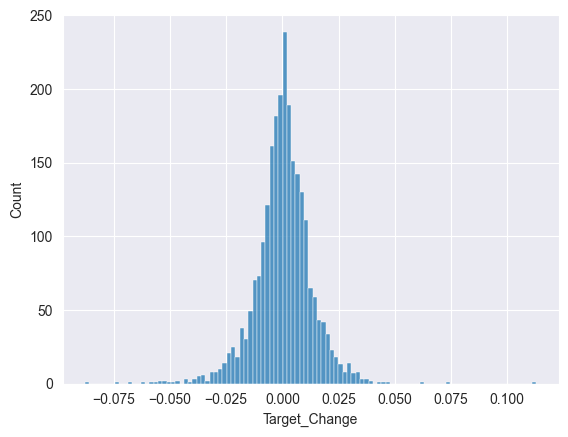

In [57]:
# plot target change
sns.histplot(df['Target_Change'])
plt.show()

In [46]:
# define 4 phases of data:
# 1. start - 30 november 2007 (before)
# 2. 3 december 2007 - 30 june 2009 (during)
# 3. 1 july 2009 - 28 march 2013 (after)
# 4. 2 april 2013 - 20 october 2014 (post)

before = df[df['Date'] <= '2007-11-30']
during = df[(df['Date'] >= '2007-12-03') & (df['Date'] <= '2009-06-30')]
after = df[(df['Date'] >= '2009-07-01') & (df['Date'] <= '2013-03-28')]
post = df[(df['Date'] >= '2013-04-02') & (df['Date'] <= '2014-10-20')]

all_phases = {'before': before, 'during': during, 'after': after, 'post': post}

In [47]:
# save the data
# before.to_csv("before.csv", index=False)
# during.to_csv("during.csv", index=False)
# after.to_csv("after.csv", index=False)
# post.to_csv("post.csv", index=False)


In [53]:
# fit a decision tree model
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# X all columns except 'Date', 'Target'
# train a tree for every phase
for phase, data in all_phases.items():
    X = data.drop(columns=['Date', 'Target', 'Target_Change'])
    y_c = data['Target']
    y_r = data['Target_Change']
    classifier = DecisionTreeClassifier()
    classifier.fit(X, y_c)
    regressor = DecisionTreeRegressor()
    regressor.fit(X, y_r)
    # get accuracy
    accuracy_c = classifier.score(X, y_c)
    accuracy_r = regressor.score(X, y_r)
    print(f'{phase} accuracy: {accuracy_c} {accuracy_r}')
    



before accuracy: 1.0 1.0
during accuracy: 1.0 1.0
after accuracy: 1.0 1.0
post accuracy: 1.0 1.0


In [54]:
# now the same but with train test split
from sklearn.model_selection import train_test_split

for phase, data in all_phases.items():
    X = data.drop(columns=['Date', 'Target', 'Target_Change'])
    y_c = data['Target']
    y_r = data['Target_Change']
    X_train, X_test, y_train_c, y_test_c, y_train_r, y_test_r = train_test_split(X, y_c, y_r, test_size=0.2)
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train_c)
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train_r)
    # get accuracy
    accuracy_c = classifier.score(X_test, y_test_c)
    accuracy_r = regressor.score(X_test, y_test_r)
    print(f'{phase} accuracy: {accuracy_c} {accuracy_r}')

before accuracy: 0.5364238410596026 -0.6373914269986516
during accuracy: 0.5789473684210527 -0.8311577171656153
after accuracy: 0.4603174603174603 -1.6991122763008253
post accuracy: 0.6025641025641025 -0.5551318865786081


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split

# Load the dataset
data_path = 'basicdata.csv'
data = pd.read_csv(data_path)

# Preprocess the data
data['GoldChg'] = data['Close_gold'].pct_change()
data['CFSIChg'] = data['CFSI'].pct_change()
data['OilChg'] = data['Close_oil'].pct_change()
data['SPChg'] = data['Close_sp500'].pct_change()
data['VIXChg'] = data['Close_vix'].pct_change()
data['EuroChg'] = data['Close_eur_usd'].pct_change()

data['GoldDir'] = (data['GoldChg'] > 0).astype(int)
data['CFSIDir'] = (data['CFSIChg'] > 0).astype(int)
data['OilDir'] = (data['OilChg'] > 0).astype(int)
data['SPDir'] = (data['SPChg'] > 0).astype(int)
data['VIXDir'] = (data['VIXChg'] > 0).astype(int)
data['EuroDir'] = (data['EuroChg'] > 0).astype(int)

data['GoldReturn'] = data['Close_gold'].pct_change().shift(-1)

# Drop rows with NaN values created by pct_change and shift
data = data.dropna()
# replace inf with 0
data = data.replace([np.inf, -np.inf], 0)
data = data[data['GoldReturn'] != 0]

# Define date ranges for each period
before_period = (data['Date'] < '2007-12-03')
during_period = (data['Date'] >= '2007-12-03') & (data['Date'] <= '2009-06-30')
after_period = (data['Date'] > '2009-06-30') & (data['Date'] <= '2013-03-28')
post_period = (data['Date'] > '2013-03-28')

# Split the data into the four periods
data_before = data[before_period]
data_during = data[during_period]
data_after = data[after_period]
data_post = data[post_period]

# Define feature columns
features = ['GoldChg', 'CFSIChg', 'OilChg', 'SPChg', 'VIXChg', 'EuroChg', 
            'GoldDir', 'CFSIDir', 'OilDir', 'SPDir', 'VIXDir', 'EuroDir']

In [12]:

# Function to train and evaluate XGBoost model with specific depth for regression
def train_xgboost_regression(data, features, target, test_size=0.2, max_depth=2):
    X = data[features]
    y = data[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    model = xgb.XGBRegressor(max_depth=max_depth, random_state=42, n_estimators=100)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return model, mse, rmse, mape, r2

# Train and evaluate XGBoost models for each period with specific depth for regression
model_before_xgb, mse_before_xgb, rmse_before_xgb, mape_before_xgb, r2_before_xgb = train_xgboost_regression(data_before, features, 'GoldReturn')
model_during_xgb, mse_during_xgb, rmse_during_xgb, mape_during_xgb, r2_during_xgb = train_xgboost_regression(data_during, features, 'GoldReturn')
model_after_xgb, mse_after_xgb, rmse_after_xgb, mape_after_xgb, r2_after_xgb = train_xgboost_regression(data_after, features, 'GoldReturn')
model_post_xgb, mse_post_xgb, rmse_post_xgb, mape_post_xgb, r2_post_xgb = train_xgboost_regression(data_post, features, 'GoldReturn')

# Train and evaluate XGBoost model for the entire dataset with specific depth for regression
model_full_xgb, mse_full_xgb, rmse_full_xgb, mape_full_xgb, r2_full_xgb = train_xgboost_regression(data, features, 'GoldReturn')

# Display regression metrics for XGBoost models
results_xgb = {
    'Period': ['Before', 'During', 'After', 'Post', 'Full'],
    'MSE': [mse_before_xgb, mse_during_xgb, mse_after_xgb, mse_post_xgb, mse_full_xgb],
    'RMSE': [rmse_before_xgb, rmse_during_xgb, rmse_after_xgb, rmse_post_xgb, rmse_full_xgb],
    'MAPE': [mape_before_xgb, mape_during_xgb, mape_after_xgb, mape_post_xgb, mape_full_xgb],
    'R^2': [r2_before_xgb, r2_during_xgb, r2_after_xgb, r2_post_xgb, r2_full_xgb]
}

results_xgb_df = pd.DataFrame(results_xgb)
results_xgb_df


,Period,MSE,RMSE,MAPE,R^2
0,Before,0.000176,0.013269,1.680764,-0.105074
1,During,0.000673,0.025946,1.726908,-0.586849
2,After,0.000130,0.011404,2.076025,-0.249695
3,Post,0.000304,0.017438,2.431883,-0.148865
4,Full,0.000166,0.012871,1.896321,-0.145111


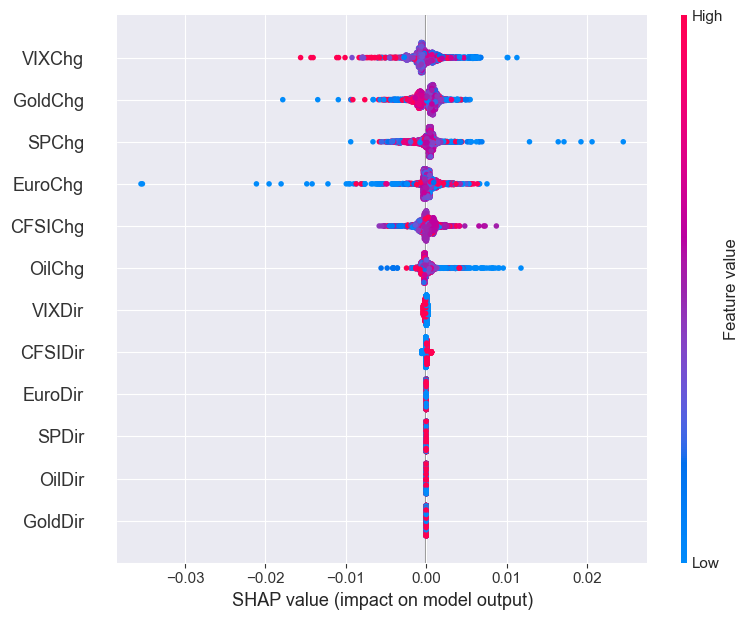

In [16]:
# get shap values
import shap

# Train the SHAP explainer for the XGBoost model
explainer = shap.TreeExplainer(model_full_xgb, data=data[features])
shap_values = explainer.shap_values(data[features])

# Display SHAP summary plot
shap.summary_plot(shap_values, data[features])

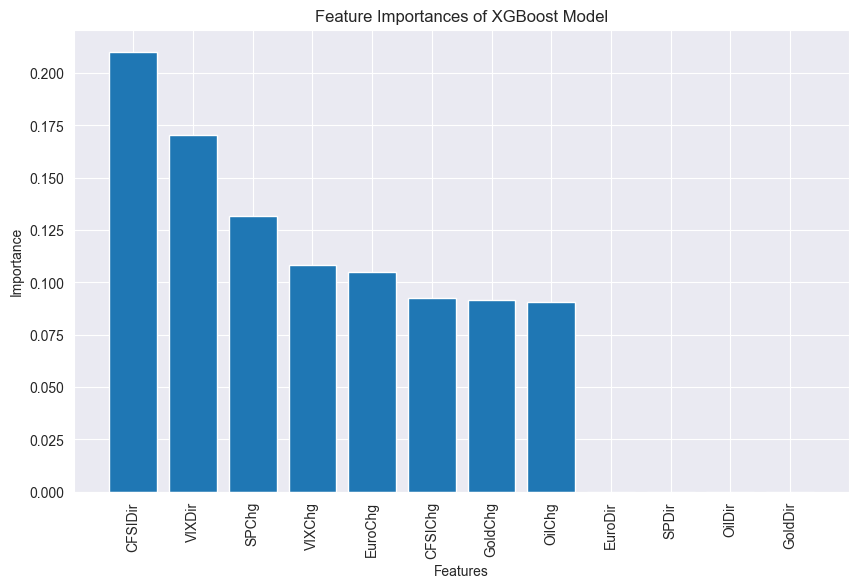

In [17]:
import matplotlib.pyplot as plt

X = data[features]
# feature importances of xgboost
importances = model_full_xgb.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the XGBoost model
plt.figure(figsize=(10, 6))
plt.title('Feature Importances of XGBoost Model')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

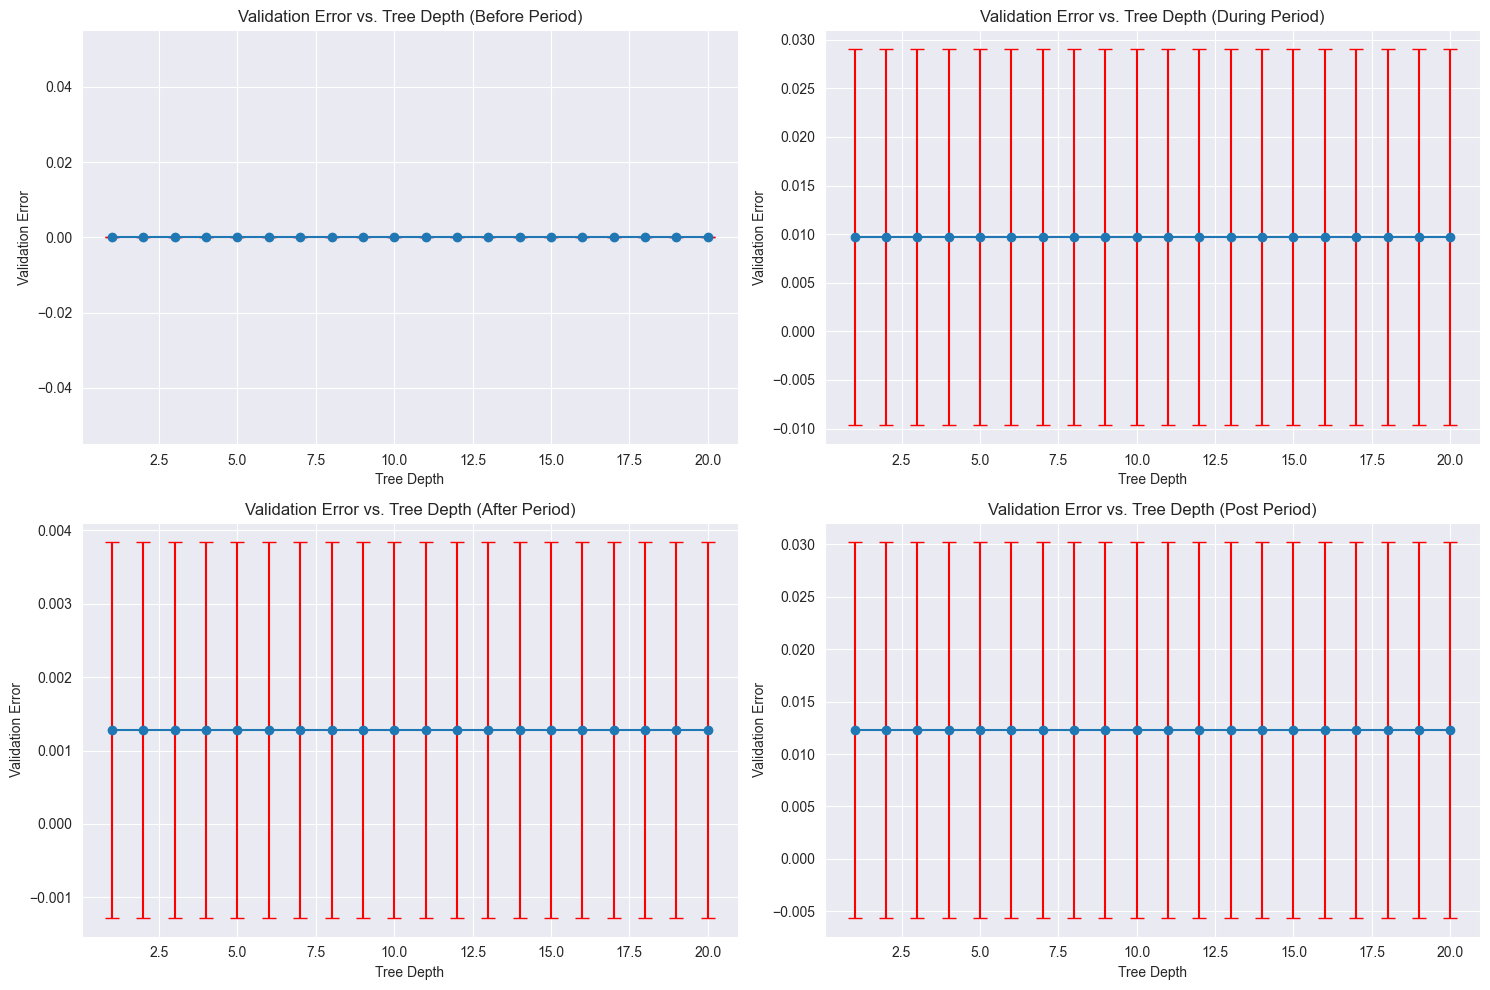

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'basicdata.csv'
data = pd.read_csv(data_path)

# Preprocess the data
data['GoldChg'] = data['Close_gold'].pct_change()
data['CFSIChg'] = data['CFSI'].pct_change()
data['OilChg'] = data['Close_oil'].pct_change()
data['SPChg'] = data['Close_sp500'].pct_change()
data['VIXChg'] = data['Close_vix'].pct_change()
data['EuroChg'] = data['Close_eur_usd'].pct_change()

data['GoldDir'] = (data['GoldChg'] > 0).astype(int)
data['CFSIDir'] = (data['CFSIChg'] > 0).astype(int)
data['OilDir'] = (data['OilChg'] > 0).astype(int)
data['SPDir'] = (data['SPChg'] > 0).astype(int)
data['VIXDir'] = (data['VIXChg'] > 0).astype(int)
data['EuroDir'] = (data['EuroChg'] > 0).astype(int)

# Drop rows with NaN values created by pct_change
data = data.dropna()

# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
data.dropna(inplace=True)

# Define feature columns
features = ['GoldChg', 'CFSIChg', 'OilChg', 'SPChg', 'VIXChg', 'EuroChg', 
            'GoldDir', 'CFSIDir', 'OilDir', 'SPDir', 'VIXDir', 'EuroDir']

# Define target variable
target = 'GoldDir'

# Define date ranges for each period
before_period = (data['Date'] < '2007-12-03')
during_period = (data['Date'] >= '2007-12-03') & (data['Date'] <= '2009-06-30')
after_period = (data['Date'] > '2009-06-30') & (data['Date'] <= '2013-03-28')
post_period = (data['Date'] > '2013-03-28')

# Split the data into the four periods
data_before = data[before_period]
data_during = data[during_period]
data_after = data[after_period]
data_post = data[post_period]

# Function to perform cross-validation and plot validation error for different tree depths using TimeSeriesSplit
def time_series_cv_plot(data, features, target, n_splits=5):
    X = data[features]
    y = data[target]

    depths = range(1, 21)
    mean_errors = []
    std_errors = []

    tscv = TimeSeriesSplit(n_splits=n_splits)

    for depth in depths:
        model = DecisionTreeClassifier(max_depth=depth, random_state=42)
        scores = cross_val_score(model, X, y, cv=tscv, scoring='accuracy')
        mean_errors.append(1 - scores.mean())
        std_errors.append(scores.std())

    return depths, mean_errors, std_errors

# Collect data for each period for classification with TimeSeriesSplit
depths_before_cv, mean_errors_before_cv, std_errors_before_cv = time_series_cv_plot(data_before, features, target)
depths_during_cv, mean_errors_during_cv, std_errors_during_cv = time_series_cv_plot(data_during, features, target)
depths_after_cv, mean_errors_after_cv, std_errors_after_cv = time_series_cv_plot(data_after, features, target)
depths_post_cv, mean_errors_post_cv, std_errors_post_cv = time_series_cv_plot(data_post, features, target)

# Plotting the results in a 2x2 plot for classification with TimeSeriesSplit
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].errorbar(depths_before_cv, mean_errors_before_cv, yerr=std_errors_before_cv, fmt='-o', capsize=5, capthick=1, ecolor='red')
axs[0, 0].set_title('Validation Error vs. Tree Depth (Before Period)')
axs[0, 0].set_xlabel('Tree Depth')
axs[0, 0].set_ylabel('Validation Error')
axs[0, 0].grid(True)

axs[0, 1].errorbar(depths_during_cv, mean_errors_during_cv, yerr=std_errors_during_cv, fmt='-o', capsize=5, capthick=1, ecolor='red')
axs[0, 1].set_title('Validation Error vs. Tree Depth (During Period)')
axs[0, 1].set_xlabel('Tree Depth')
axs[0, 1].set_ylabel('Validation Error')
axs[0, 1].grid(True)

axs[1, 0].errorbar(depths_after_cv, mean_errors_after_cv, yerr=std_errors_after_cv, fmt='-o', capsize=5, capthick=1, ecolor='red')
axs[1, 0].set_title('Validation Error vs. Tree Depth (After Period)')
axs[1, 0].set_xlabel('Tree Depth')
axs[1, 0].set_ylabel('Validation Error')
axs[1, 0].grid(True)

axs[1, 1].errorbar(depths_post_cv, mean_errors_post_cv, yerr=std_errors_post_cv, fmt='-o', capsize=5, capthick=1, ecolor='red')
axs[1, 1].set_title('Validation Error vs. Tree Depth (Post Period)')
axs[1, 1].set_xlabel('Tree Depth')
axs[1, 1].set_ylabel('Validation Error')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()
